[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-2/state-schema.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239426-lesson-1-state-schema)

In [1]:
from typing_extensions import TypedDict

class TypedDictState(TypedDict):
    driver: str
    team: str

In [2]:
from typing import Literal

class TypedDictState(TypedDict):
    driver: str
    tyre_compound: Literal["Soft", "Medium", "Hard"]

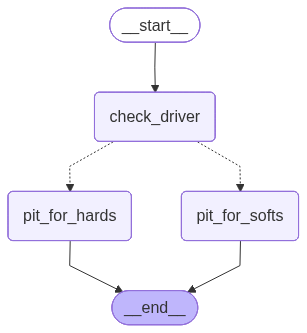

In [3]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def check_driver(state):
    print("---Checking driver status---")
    return {"driver": state['driver'] + " is on track."}

def pit_for_softs(state):
    print("---Pitting for Softs---")
    return {"tyre_compound": "Soft"}

def pit_for_hards(state):
    print("---Pitting for Hards---")
    return {"tyre_compound": "Hard"}

def decide_strategy(state) -> Literal["pit_for_softs", "pit_for_hards"]:
    print("---Team making a strategy call...---")
    if random.random() < 0.5:
        return "pit_for_softs"

    return "pit_for_hards"

builder = StateGraph(TypedDictState)
builder.add_node("check_driver", check_driver)
builder.add_node("pit_for_softs", pit_for_softs)
builder.add_node("pit_for_hards", pit_for_hards)

builder.add_edge(START, "check_driver")
builder.add_conditional_edges("check_driver", decide_strategy)
builder.add_edge("pit_for_softs", END)
builder.add_edge("pit_for_hards", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
graph.invoke({"driver":"Sebastian Vettel"})

---Checking driver status---
---Team making a strategy call...---
---Pitting for Hards---


{'driver': 'Sebastian Vettel is on track.', 'tyre_compound': 'Hard'}

In [5]:
from dataclasses import dataclass

@dataclass
class DataclassState:
    driver: str
    tyre_compound: Literal["Soft", "Medium", "Hard"]

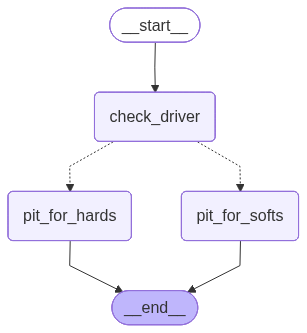

In [6]:
def check_driver(state):
    print("---Checking driver status---")
    return {"driver": state.driver + " is on track."}

builder = StateGraph(DataclassState)
builder.add_node("check_driver", check_driver)
builder.add_node("pit_for_softs", pit_for_softs)
builder.add_node("pit_for_hards", pit_for_hards)

builder.add_edge(START, "check_driver")
builder.add_conditional_edges("check_driver", decide_strategy)
builder.add_edge("pit_for_softs", END)
builder.add_edge("pit_for_hards", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke(DataclassState(driver="Max Verstappen", tyre_compound="Hard"))

---Checking driver status---
---Team making a strategy call...---
---Pitting for Hards---


{'driver': 'Max Verstappen is on track.', 'tyre_compound': 'Hard'}

In [8]:
dataclass_instance = DataclassState(driver="Charles Leclerc", tyre_compound="Intermediate")
print(dataclass_instance)

DataclassState(driver='Charles Leclerc', tyre_compound='Intermediate')


In [9]:
from pydantic import BaseModel, field_validator, ValidationError

class PydanticState(BaseModel):
    driver: str
    tyre_compound: str

    @field_validator('tyre_compound')
    @classmethod
    def validate_tyres(cls, value):
        if value not in ["Soft", "Medium", "Hard"]:
            raise ValueError("Tyre compound must be 'Soft', 'Medium', or 'Hard'")
        return value

try:
    state = PydanticState(driver="Carlos Sainz", tyre_compound="Wet")
except ValidationError as e:
    print("Validation Error caught as expected:\n", e)

Validation Error caught as expected:
 1 validation error for PydanticState
tyre_compound
  Value error, Tyre compound must be 'Soft', 'Medium', or 'Hard' [type=value_error, input_value='Wet', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/value_error


We can use `PydanticState` in our graph seamlessly. 

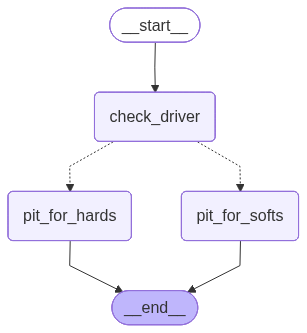

In [10]:
builder = StateGraph(PydanticState)
builder.add_node("check_driver", check_driver)
builder.add_node("pit_for_softs", pit_for_softs)
builder.add_node("pit_for_hards", pit_for_hards)

builder.add_edge(START, "check_driver")
builder.add_conditional_edges("check_driver", decide_strategy)
builder.add_edge("pit_for_softs", END)
builder.add_edge("pit_for_hards", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke(PydanticState(driver="Sergio Perez", tyre_compound="Medium"))

---Checking driver status---
---Team making a strategy call...---
---Pitting for Hards---


{'driver': 'Sergio Perez is on track.', 'tyre_compound': 'Hard'}